## **1. Data Loading & Description**

In [12]:
pip install scikit-learn

In [13]:
pip install imblearn

In [14]:
pip install shap

In [15]:
pip install xgboost

In [16]:
pip install catboost

In [17]:
pip install lightgbm

In [58]:
# Import Library Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import shap

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV, train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import RFE
from sklearn.feature_selection import mutual_info_classif
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import RidgeCV
from time import time
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report
import csv
from scipy.stats import randint
from scipy.stats import uniform

In [19]:
WDBC = pd.read_csv('WDBC.csv', sep=',')
WDBC

,ID,Output,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,...,largest facial dimensions,largest,largest radius,largest texture,largest perimeter,largest area,largest smoothness,largest compactness,largest concavity,largest concave points
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [20]:
WDBC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         569 non-null    int64  
 1   Output                     569 non-null    object 
 2   mean radius                569 non-null    float64
 3   mean texture               569 non-null    float64
 4   mean perimeter             569 non-null    float64
 5   mean area                  569 non-null    float64
 6   mean smoothness            569 non-null    float64
 7   mean compactness           569 non-null    float64
 8   mean concavity             569 non-null    float64
 9   mean concave points        569 non-null    float64
 10  mean symmetry              569 non-null    float64
 11  mean facial dimensions     569 non-null    float64
 12  std. Err.                  569 non-null    float64
 13  std. Err. radius           569 non-null    float64

## **2. Preprocessing Data**

In [35]:
# Hitung jumlah churn dan non-churn
WDBC['Output'].value_counts()

,count
Output,
B,357
M,212


### Data Balancing

In [21]:
# Hitung jumlah churn dan non-churn
WDBC['Output'].value_counts()

,count
Output,
B,357
M,212


In [22]:
# X = new_churn.drop(['IS_CHURN', 'LOS_GROUP', 'PAYMENT_METHOD', 'KAT_HVC_NEW'], axis=1)
# y = new_churn['IS_CHURN']

In [23]:
# smote = SMOTEENN()
# X_resampled, y_resampled = smote.fit_resample(X_new, y)

# print("The new data contains {} rows".format(X_resampled.shape[0]))

In [24]:
# y_resampled.value_counts()

In [25]:
# # Hitung distribusi dari nilai y_resampled
# y_counts = y_resampled.value_counts()

# # Buat pie chart berdasarkan distribusi y_resampled
# plt.pie(
#     y_counts,
#     labels=['Not-Churn Customer', 'Churn Customer'],
#     autopct='%1.1f%%',
#     startangle=90,
#     colors=['#FF5733', 'yellow'],
#     explode=(0, 0.1)
# )

# # Tambahkan judul
# plt.title('Churn - Not-Churn %')

# # Tampilkan plot
# plt.show()

### Data Splitting

In [36]:
X = WDBC.drop(['Output', 'ID'], axis=1)
y = WDBC['Output'].map({'B':0,'M':1})

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [39]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((398, 30), (171, 30), (398,), (171,))

### Data Scaling

In [40]:
X_train.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean facial dimensions,...,largest facial dimensions,largest,largest radius,largest texture,largest perimeter,largest area,largest smoothness,largest compactness,largest concavity,largest concave points
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,...,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,14.366221,19.460628,93.592035,679.413568,0.096537,0.105043,0.090498,0.050368,0.181473,0.062523,...,16.552618,25.912864,109.227412,913.615327,0.132438,0.254008,0.271130,0.116103,0.288885,0.083446
std,3.661767,4.272834,25.243252,371.892129,0.013810,0.052040,0.080831,0.039522,0.026433,0.006724,...,4.990019,6.116405,34.732169,592.712345,0.022597,0.150474,0.197579,0.064700,0.056950,0.017649
min,7.691000,10.380000,48.340000,170.400000,0.064290,0.023440,0.000000,0.000000,0.106000,0.049960,...,8.678000,12.490000,54.490000,223.600000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.817500,16.210000,75.940000,429.650000,0.086740,0.066443,0.030090,0.020905,0.163800,0.057495,...,13.060000,21.450000,84.492500,521.350000,0.117025,0.148600,0.121400,0.065198,0.250450,0.071170
50%,13.505000,19.105000,87.410000,562.550000,0.096665,0.095445,0.064315,0.034190,0.180000,0.061360,...,15.140000,25.540000,99.190000,705.800000,0.131550,0.218650,0.229000,0.102300,0.282700,0.079900
75%,16.292500,21.962500,107.950000,825.050000,0.105050,0.130475,0.136075,0.077468,0.195300,0.066110,...,19.767500,30.342500,129.000000,1210.000000,0.146450,0.325250,0.382400,0.160500,0.317550,0.091360
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.095020,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.105000,0.291000,0.555800,0.207500


In [41]:
# Buat objek StandardScaler
scaler = StandardScaler()

# Fit dan transform data training
X_train = scaler.fit_transform(X_train)

# Transform data testing
X_test = scaler.transform(X_test)

In [42]:
# Hitung rata-rata dan standar deviasi dari data training
mean = X_train.mean()
std = X_train.std()

# Hitung Z-score untuk data training
X_train = (X_train - mean) / std

# Hitung Z-score untuk data testing menggunakan mean dan std dari data training
X_test = (X_test - mean) / std

## **3. Build Model**

In [43]:
# Fungsi untuk mencetak laporan klasifikasi, akurasi, confusion matrix, AUC & ROC
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print('Classification report:\n', metrics.classification_report(y_test, y_pred))
    print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
    print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

    # Menghitung AUC & ROC
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:,1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        roc_auc = auc(fpr, tpr)
        print('AUC:', roc_auc)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
    elif hasattr(model, "decision_function"):
        y_scores = model.decision_function(X_test)
        fpr, tpr, _ = roc_curve(y_test, y_scores)
        roc_auc = roc_auc_score(y_test, y_scores)
        print('AUC:', roc_auc)

        # Plot ROC curve
        plt.figure()
        plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic')
        plt.legend(loc="lower right")
        plt.show()
    else:
        print("Model does not support predict_proba method.")

# def evaluate_models(models, X_test, y_test):
#     plt.figure()

#     for model_name, model in models.items():
#         y_pred = model.predict(X_test)
#         print(f'Classification report for {model_name}:\n', metrics.classification_report(y_test, y_pred))
#         print(f'Accuracy for {model_name}:', metrics.accuracy_score(y_test, y_pred))
#         print(f'Confusion Matrix for {model_name}:\n', metrics.confusion_matrix(y_test, y_pred))

#         if hasattr(model, "predict_proba"):
#             y_pred_proba = model.predict_proba(X_test)[:,1]
#             fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
#             roc_auc = roc_auc_score(y_test, y_pred_proba)
#         elif hasattr(model, "decision_function"):
#             y_scores = model.decision_function(X_test)
#             fpr, tpr, _ = roc_curve(y_test, y_scores)
#             roc_auc = roc_auc_score(y_test, y_scores)
#         else:
#             print(f"Model {model_name} does not support predict_proba or decision_function method.")
#             continue

#         plt.plot(fpr, tpr, lw=2, label=f'{model_name} (AUC = {roc_auc:.2f})')

#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic')
#     plt.legend(loc="lower right")
#     plt.show()

In [44]:
# models = {
#     'Decision Tree': DecisionTreeClassifier(),
#     'Random Forest': RandomForestClassifier(),
#     'LogisticRegression':LogisticRegression(random_state=123),
#     'RidgeCV': RidgeClassifier(),
#     'XG Boost': XGBClassifier(),
#     'Catboost': CatBoostClassifier(verbose=0),
#     'Light GBM': LGBMClassifier(),
#     'KNN': KNeighborsClassifier(n_neighbors=3)
# }

# # Melatih dan mengevaluasi model
# for model in models.values():
#     model.fit(X_train, y_train)

# evaluate_models(models, X_test, y_test)

### Decision Tree

Classification report:
               precision    recall  f1-score   support

           0       0.95      0.97      0.96       113
           1       0.95      0.90      0.92        58

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy: 0.9473684210526315
Confusion Matrix:
 [[110   3]
 [  6  52]]
AUC: 0.9350015257857797


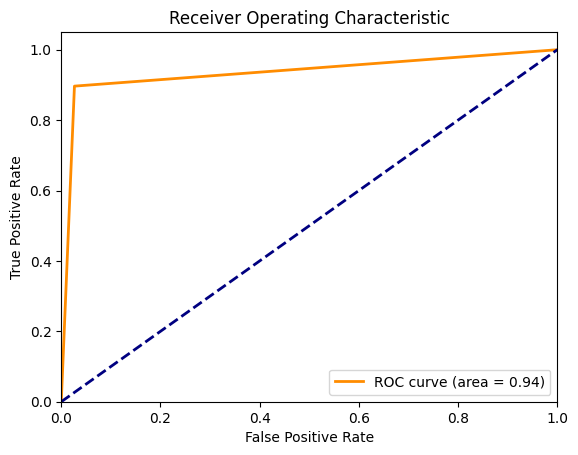

In [45]:
# Decision Tree
dtree = DecisionTreeClassifier()
dtree.fit(X_train, y_train)
evaluate_model(dtree, X_test, y_test)

In [46]:
# Hyperparameter Tuning
# Randomized Search
param_dist = {'max_depth': randint(1,20), 'min_samples_split': randint(2,20)}
dt = DecisionTreeClassifier()
rand_search = RandomizedSearchCV(dt, param_distributions=param_dist, n_iter=5, cv=5)
rand_search.fit(X_train, y_train)
best_dt = rand_search.best_estimator_
print('Best hyperparameters for Decision Tree:', rand_search.best_params_)

# Grid Search
parameters = {'max_depth': range(5,20,5), 'min_samples_split': range(2,20,5)}
grid_search = GridSearchCV(dt, parameters, cv=5)
grid_search.fit(X_train, y_train)

Best hyperparameters for Decision Tree: {'max_depth': 6, 'min_samples_split': 2}


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': range(5, 20, 5),
                         'min_samples_split': range(2, 20, 5)})

In [47]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_churn.csv', index = False, header=True)

Classification report:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96       113
           1       0.98      0.86      0.92        58

    accuracy                           0.95       171
   macro avg       0.96      0.93      0.94       171
weighted avg       0.95      0.95      0.95       171

Accuracy: 0.9473684210526315
Confusion Matrix:
 [[112   1]
 [  8  50]]
AUC: 0.9369850472993593


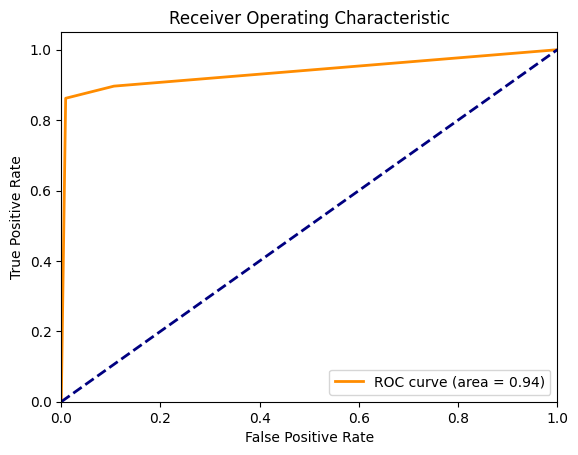

In [48]:
y_pred = best_dt.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_dt, "predict_proba"):
  y_pred_proba = best_dt.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

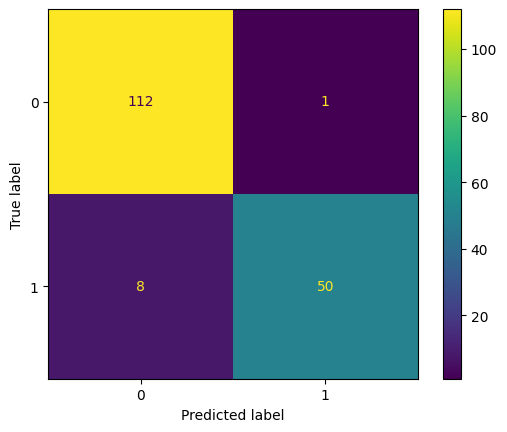

In [49]:
# Generate predictions with the best model
y_pred = best_dt.predict(X_test)
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

In [50]:
# target_names = ['class 0', 'class 1']

# def classifaction_report_csv(report):
#     report_data = []
#     lines = report.split('\n')
#     for line in lines[2:-3]:
#         row = {}
#         row_data = line.split('      ')
#         row['class'] = row_data[0]
#         row['precision'] = float(row_data[1])
#         row['recall'] = float(row_data[2])
#         row['f1_score'] = float(row_data[3])
#         row['support'] = float(row_data[4])
#         report_data.append(row)
#     dataframe = pd.DataFrame.from_dict(report_data)
#     dataframe.to_csv('report_mnist.csv', index = False)

# #call the classification_report first and then our new function

# report = classification_report(y_test, y_pred, target_names=target_names)
# classifaction_report_csv(report)

### Random Forest

Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       113
           1       1.00      0.90      0.95        58

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[113   0]
 [  6  52]]
AUC: 0.9857339029600245


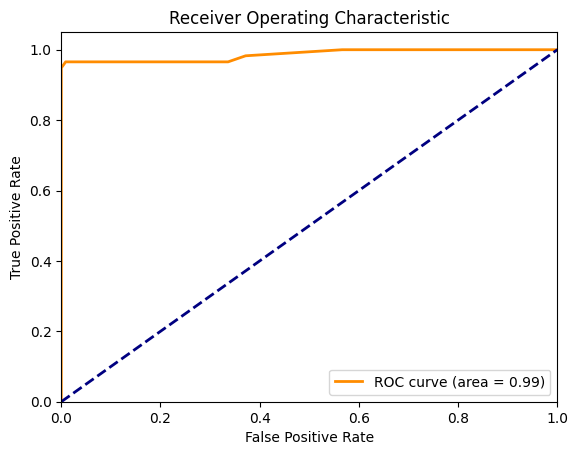

In [51]:
# Random Forest
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
evaluate_model(rf, X_test, y_test)

In [52]:
# Hyperparameter Tuning
# Randomized Search
param_dist = {'n_estimators': randint(10,500),
              'max_depth': randint(1,20)}
# Create a random forest classifier
rf = RandomForestClassifier()
# Use random search to find the best hyperparameters
rand_search = RandomizedSearchCV(rf,
                                 param_distributions = param_dist,
                                 n_iter=5,
                                 cv=5)
# Fit the random search object to the data
rand_search.fit(X_train, y_train)
# Create a variable for the best model
best_rf = rand_search.best_estimator_
# Print the best hyperparameters
print('Best hyperparameters:',  rand_search.best_params_)

# Grid Search
parameters = {'n_estimators':range(15,50,15), 'max_depth':range(5,20,5)}
grid_search = GridSearchCV(rf,
                                 parameters,
                                 cv=5)
grid_search.fit(X_train, y_train)

Best hyperparameters: {'max_depth': 8, 'n_estimators': 128}


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': range(5, 20, 5),
                         'n_estimators': range(15, 50, 15)})

In [53]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_rf_churn.csv', index = False, header=True)

Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       113
           1       1.00      0.91      0.95        58

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy: 0.9707602339181286
Confusion Matrix:
 [[113   0]
 [  5  53]]
AUC: 0.9848947207812022


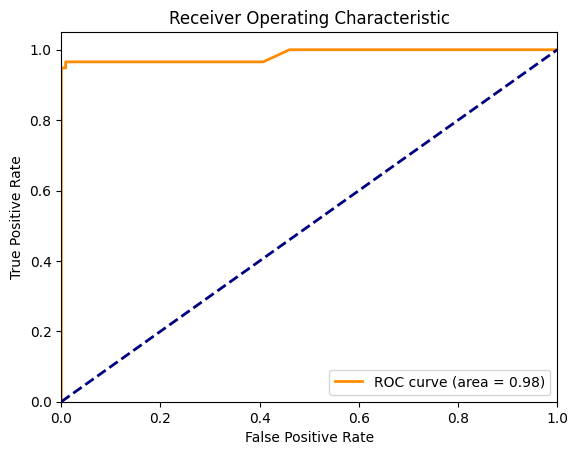

In [54]:
y_pred = best_rf.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_rf, "predict_proba"):
  y_pred_proba = best_rf.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

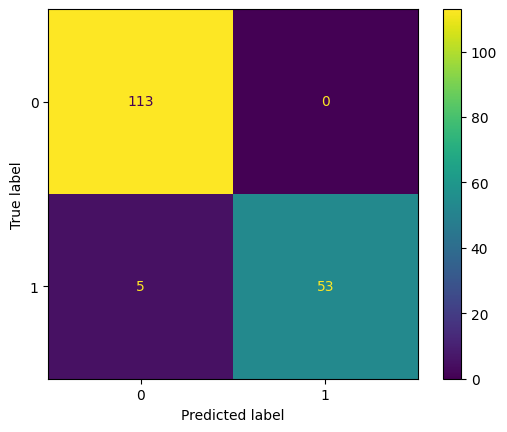

In [55]:
# Generate predictions with the best model
y_pred = best_rf.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Logistic Regression

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       113
           1       0.98      0.93      0.96        58

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy: 0.9707602339181286
Confusion Matrix:
 [[112   1]
 [  4  54]]
AUC: 0.9919133353677144


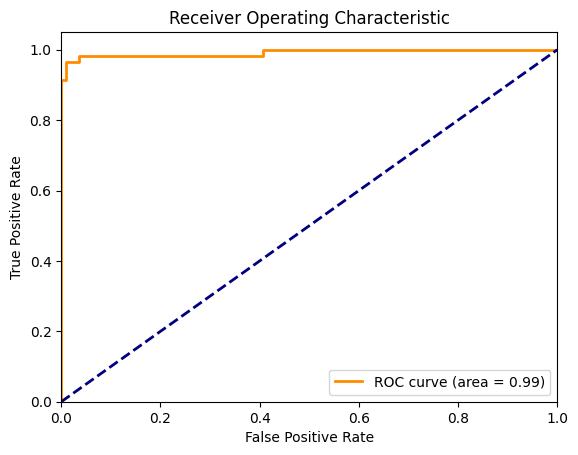

In [56]:
# Logistic Regression
logreg = LogisticRegression(random_state=123)
logreg.fit(X_train, y_train)
evaluate_model(logreg, X_test, y_test)

In [59]:
# Random search for Logistic Regression
param_dist = {'C': uniform(0.1, 10), 'penalty': ['l1', 'l2', 'elasticnet', 'none']}
lr = LogisticRegression(solver='saga', max_iter=5000)
rand_search_lr = RandomizedSearchCV(lr, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_lr.fit(X_train, y_train)
best_lr = rand_search_lr.best_estimator_
print('Best hyperparameters for Logistic Regression:', rand_search_lr.best_params_)

# Grid search for Logistic Regression
parameters = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
grid_search_lr = GridSearchCV(lr, parameters, cv=5)
grid_search_lr.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
5 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/_pa

Best hyperparameters for Logistic Regression: {'C': 4.554885245230427, 'penalty': 'l2'}


GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=5000, solver='saga'),
             param_grid={'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']})

In [60]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_lr_churn.csv', index = False, header=True)

Classification report:
               precision    recall  f1-score   support

           0       0.97      0.98      0.97       113
           1       0.96      0.93      0.95        58

    accuracy                           0.96       171
   macro avg       0.96      0.96      0.96       171
weighted avg       0.96      0.96      0.96       171

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[111   2]
 [  4  54]]
AUC: 0.9913030210558438


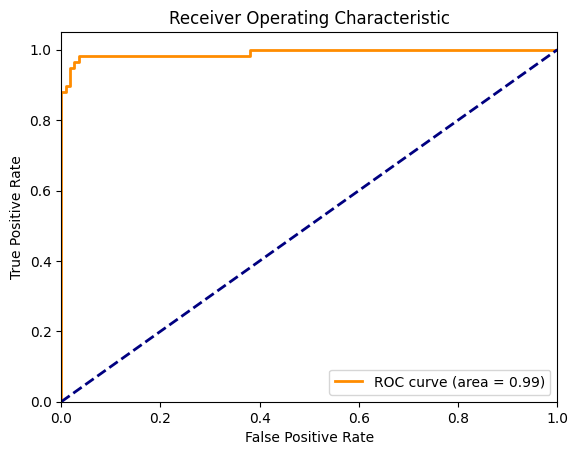

In [61]:
y_pred = best_lr.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_lr, "predict_proba"):
  y_pred_proba = best_lr.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

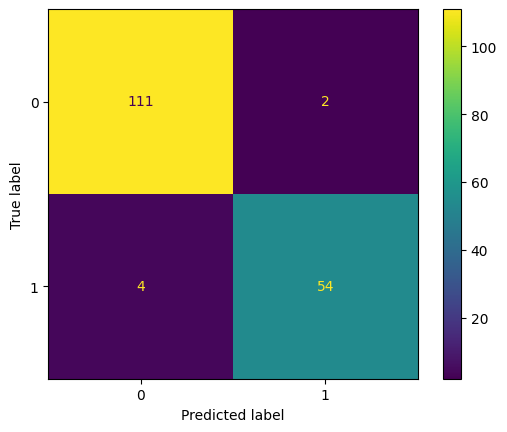

In [62]:
# Generate predictions with the best model
y_pred = best_lr.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Ridge Classifier

Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       113
           1       1.00      0.91      0.95        58

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy: 0.9707602339181286
Confusion Matrix:
 [[113   0]
 [  5  53]]
AUC: 0.9949649069270674


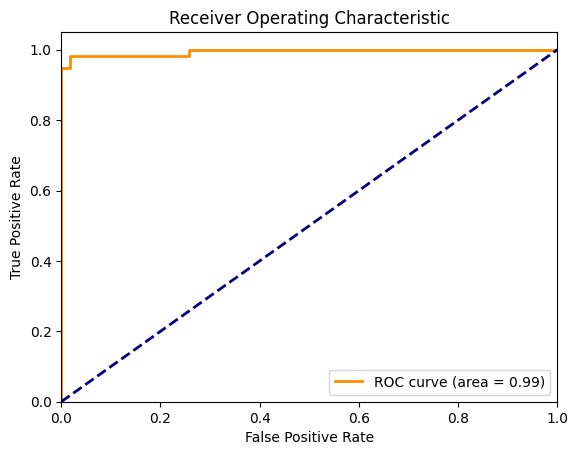

In [63]:
ridge = RidgeClassifier()
ridge.fit(X_train, y_train)
evaluate_model(ridge, X_test, y_test)

In [64]:
# Random search for Ridge Classifier
param_dist = {'alpha': uniform(0.1, 10)}
ridge = RidgeClassifier()
rand_search_ridge = RandomizedSearchCV(ridge, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_ridge.fit(X_train, y_train)
best_ridge = rand_search_ridge.best_estimator_
print('Best hyperparameters for Ridge Classifier:', rand_search_ridge.best_params_)

# Grid search for Ridge Classifier
parameters = {'alpha': [0.1, 1, 10]}
grid_search_ridge = GridSearchCV(ridge, parameters, cv=5)
grid_search_ridge.fit(X_train, y_train)

Best hyperparameters for Ridge Classifier: {'alpha': 2.8184299640922217}


GridSearchCV(cv=5, estimator=RidgeClassifier(),
             param_grid={'alpha': [0.1, 1, 10]})

In [65]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_ridge_churn.csv', index = False, header=True)

In [66]:
y_pred = best_ridge.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_ridge, "predict_proba"):
  y_pred_proba = best_ridge.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       113
           1       1.00      0.91      0.95        58

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy: 0.9707602339181286
Confusion Matrix:
 [[113   0]
 [  5  53]]


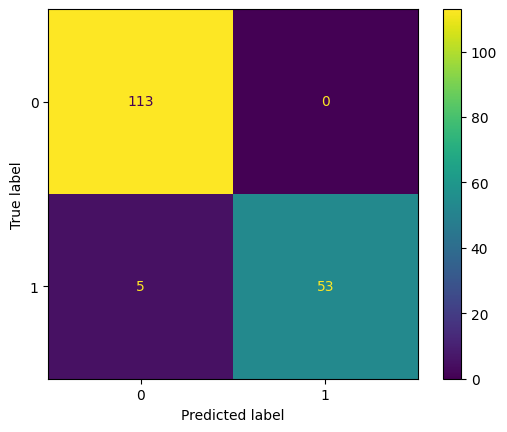

In [67]:
# Generate predictions with the best model
y_pred = best_ridge.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### XG Boost

Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       113
           1       1.00      0.90      0.95        58

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[113   0]
 [  6  52]]
AUC: 0.9868782422947817


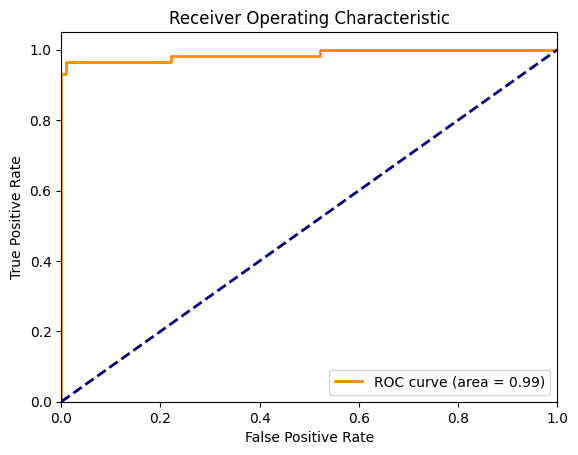

In [68]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)
evaluate_model(xgb, X_test, y_test)

In [69]:
# Random search for XGBoost
param_dist = {'n_estimators': randint(10,500), 'max_depth': randint(1,20)}
xgb = XGBClassifier()
rand_search_xgb = RandomizedSearchCV(xgb, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_xgb.fit(X_train, y_train)
best_xgb = rand_search_xgb.best_estimator_
print('Best hyperparameters for XGBoost:', rand_search_xgb.best_params_)

# Grid search for XGBoost
parameters = {'n_estimators': range(15,50,15), 'max_depth': range(5,20,5)}
grid_search_xgb = GridSearchCV(xgb, parameters, cv=5)
grid_search_xgb.fit(X_train, y_train)

Best hyperparameters for XGBoost: {'max_depth': 3, 'n_estimators': 168}


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': range(5, 20, 5),
                         'n_estimators': range(15, 50, 15)})

In [70]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_xgb_churn.csv', index = False, header=True)

Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       113
           1       1.00      0.91      0.95        58

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy: 0.9707602339181286
Confusion Matrix:
 [[113   0]
 [  5  53]]
AUC: 0.9879462923405553


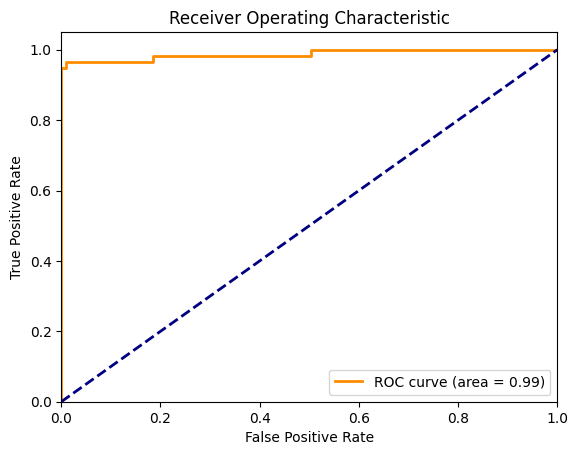

In [71]:
y_pred = best_xgb.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_xgb, "predict_proba"):
  y_pred_proba = best_xgb.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

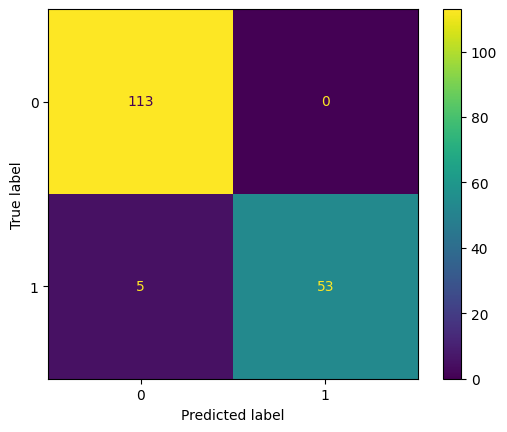

In [72]:
# Generate predictions with the best model
y_pred = best_xgb.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Cat Boost

Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       113
           1       1.00      0.91      0.95        58

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy: 0.9707602339181286
Confusion Matrix:
 [[113   0]
 [  5  53]]
AUC: 0.9853524565151053


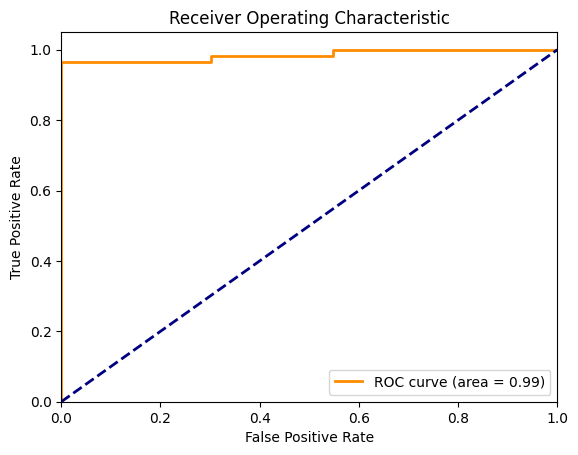

In [73]:
catboost = CatBoostClassifier(verbose=0)  # verbose=0 untuk menonaktifkan output selama pelatihan
catboost.fit(X_train, y_train)
evaluate_model(catboost, X_test, y_test)

In [96]:
# Random search for CatBoost
param_dist = {'iterations': randint(10,500), 'depth': randint(1,10)}
catboost = CatBoostClassifier(verbose=0)
rand_search_catboost = RandomizedSearchCV(catboost, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_catboost.fit(X_train, y_train)
best_catboost = rand_search_catboost.best_estimator_
print('Best hyperparameters for CatBoost:', rand_search_catboost.best_params_)

# Grid search for CatBoost
parameters = {'iterations': range(50,200,50), 'depth': range(3,10,2)}
grid_search_catboost = GridSearchCV(catboost, parameters, cv=5)
grid_search_catboost.fit(X_train, y_train)

Best hyperparameters for CatBoost: {'depth': 5, 'iterations': 303}


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7c0c03eb2800>,
             param_grid={'depth': range(3, 10, 2),
                         'iterations': range(50, 200, 50)})

In [97]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_catboost_churn.csv', index = False, header=True)

Classification report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       113
           1       1.00      0.90      0.95        58

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171

Accuracy: 0.9649122807017544
Confusion Matrix:
 [[113   0]
 [  6  52]]
AUC: 0.9865730851388466


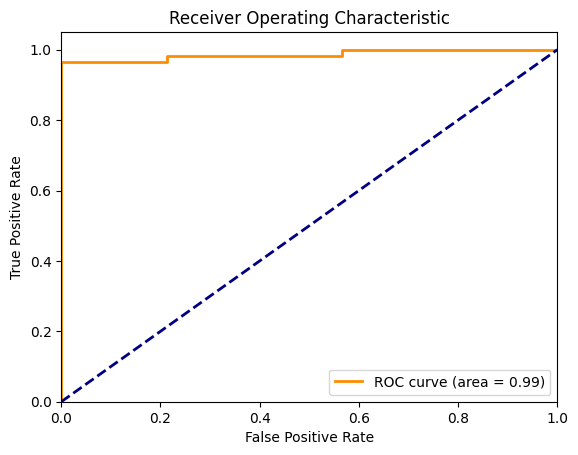

In [98]:
y_pred = best_catboost.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_catboost, "predict_proba"):
  y_pred_proba = best_catboost.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

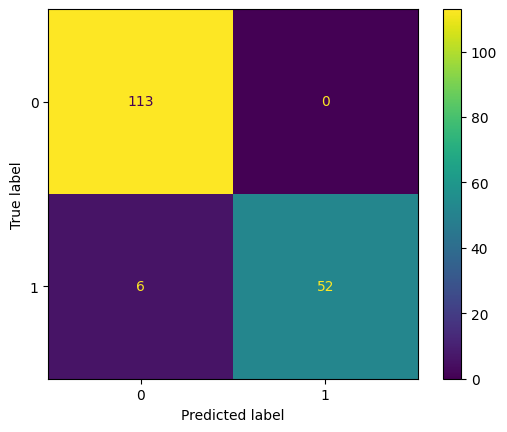

In [99]:
# Generate predictions with the best model
y_pred = best_catboost.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### Light GBM

[LightGBM] [Info] Number of positive: 154, number of negative: 244
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000253 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3976
[LightGBM] [Info] Number of data points in the train set: 398, number of used features: 30
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.386935 -> initscore=-0.460216
[LightGBM] [Info] Start training from score -0.460216
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

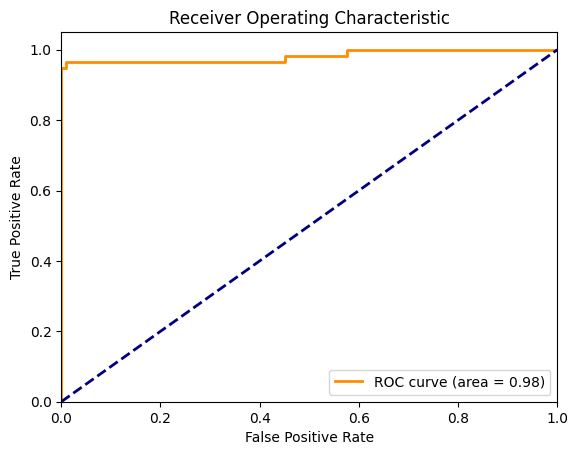

In [100]:
lgbm = LGBMClassifier()
lgbm.fit(X_train, y_train)
evaluate_model(lgbm, X_test, y_test)

In [101]:
# Random search for LightGBM
param_dist = {'n_estimators': randint(10,500), 'max_depth': randint(1,20)}
lgbm = LGBMClassifier()
rand_search_lgbm = RandomizedSearchCV(lgbm, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_lgbm.fit(X_train, y_train)
best_lgbm = rand_search_lgbm.best_estimator_
print('Best hyperparameters for LightGBM:', rand_search_lgbm.best_params_)

# Grid search for LightGBM
parameters = {'n_estimators': range(15,50,15), 'max_depth': range(5,20,5)}
grid_search_lgbm = GridSearchCV(lgbm, parameters, cv=5)
grid_search_lgbm.fit(X_train, y_train)

Streaming output truncated to the last 5000 lines.
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posit

/usr/local/lib/python3.10/dist-packages/numpy/ma/core.py:2820: RuntimeWarning: invalid value encountered in cast
  _data = np.array(data, dtype=dtype, copy=copy,


GridSearchCV(cv=5, estimator=LGBMClassifier(),
             param_grid={'max_depth': range(5, 20, 5),
                         'n_estimators': range(15, 50, 15)})

In [102]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_lgbm_churn.csv', index = False, header=True)

Classification report:
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       113
           1       1.00      0.91      0.95        58

    accuracy                           0.97       171
   macro avg       0.98      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171

Accuracy: 0.9707602339181286
Confusion Matrix:
 [[113   0]
 [  5  53]]
AUC: 0.9862679279829112


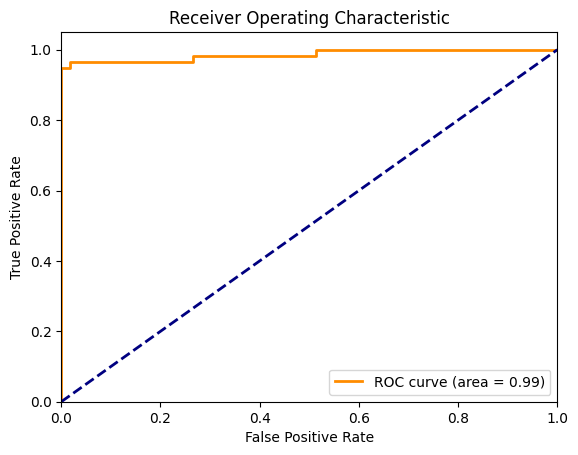

In [103]:
y_pred = best_lgbm.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_lgbm, "predict_proba"):
  y_pred_proba = best_lgbm.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

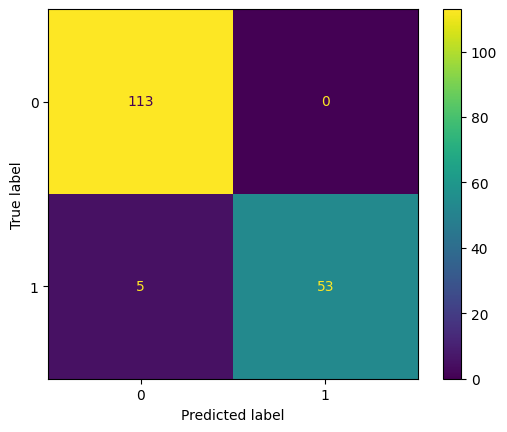

In [104]:
# Generate predictions with the best model
y_pred = best_lgbm.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();

### KNN

Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       113
           1       1.00      0.93      0.96        58

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy: 0.9766081871345029
Confusion Matrix:
 [[113   0]
 [  4  54]]
AUC: 0.9633811412877632


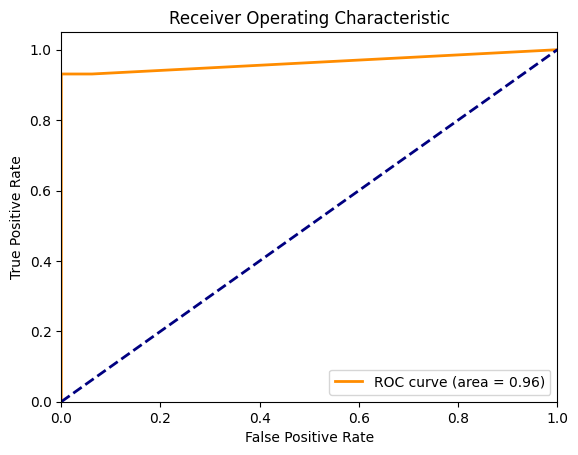

In [105]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
evaluate_model(knn, X_test, y_test)

In [106]:
# Random search for KNN
param_dist = {'n_neighbors': randint(1,30), 'weights': ['uniform', 'distance']}
knn = KNeighborsClassifier()
rand_search_knn = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=5, cv=5)
rand_search_knn.fit(X_train, y_train)
best_knn = rand_search_knn.best_estimator_
print('Best hyperparameters for KNN:', rand_search_knn.best_params_)

# Grid search for KNN
parameters = {'n_neighbors': range(1,30,5), 'weights': ['uniform', 'distance']}
grid_search_knn = GridSearchCV(knn, parameters, cv=5)
grid_search_knn.fit(X_train, y_train)

Best hyperparameters for KNN: {'n_neighbors': 9, 'weights': 'distance'}


GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 30, 5),
                         'weights': ['uniform', 'distance']})

In [107]:
hasil_grid_df = pd.concat([pd.DataFrame(grid_search.cv_results_["params"]),pd.DataFrame(grid_search.cv_results_["mean_test_score"], columns=["Accuracy"])],axis=1)

hasil_grid_df.to_csv ('hasil_grid_search_params_knn_churn.csv', index = False, header=True)

Classification report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98       113
           1       1.00      0.93      0.96        58

    accuracy                           0.98       171
   macro avg       0.98      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171

Accuracy: 0.9766081871345029
Confusion Matrix:
 [[113   0]
 [  4  54]]
AUC: 0.9743667989014342


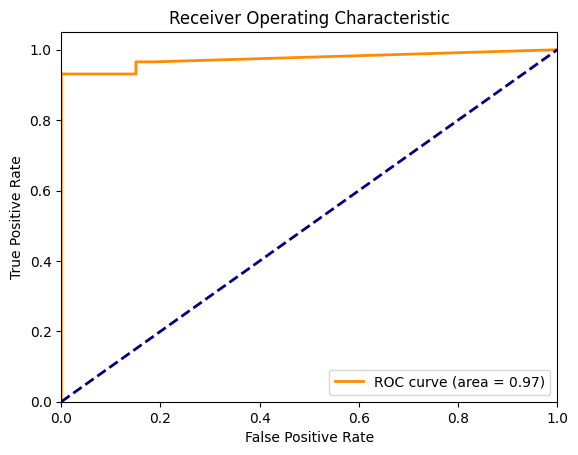

In [108]:
y_pred = best_knn.predict(X_test)
print('Classification report:\n', metrics.classification_report(y_test, y_pred))
print('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n', metrics.confusion_matrix(y_test, y_pred))

# Menghitung AUC & ROC
if hasattr(best_knn, "predict_proba"):
  y_pred_proba = best_knn.predict_proba(X_test)[:,1]
  fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
  roc_auc = auc(fpr, tpr)
  print('AUC:', roc_auc)

  # Plot ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic')
  plt.legend(loc="lower right")
  plt.show()

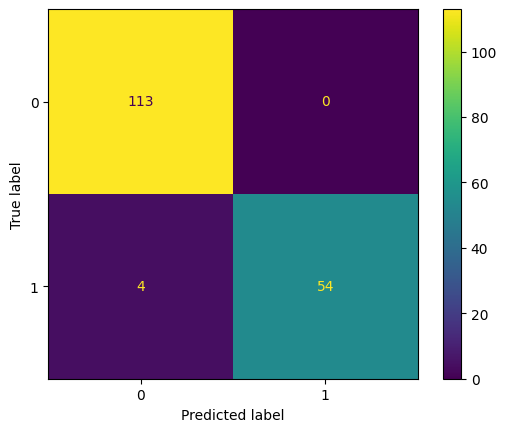

In [109]:
# Generate predictions with the best model
y_pred = best_knn.predict(X_test)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

ConfusionMatrixDisplay(confusion_matrix=cm).plot();